In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df= pd.read_hdf("all_wind.h5")

In [3]:
def remove_unnecessary_coulumns():
    global df
    for nam in df.columns:
        if len(df[nam].unique()) == 1 :
            print(nam)
            df.drop([nam],axis=1,inplace=True)
remove_unnecessary_coulumns()

trajectory__boutFrame
trajectory__compensation
trajectory__gain
trajectory__impose
trajectory__imposeHeading
trajectory__imposeResponse
trajectory__imposeResponseHeading
trajectory__imposeResponseSmooth
trajectory__key
trajectory__o1Pos_x
trajectory__o1Pos_y
trajectory__o1Pos_z
trajectory__o2Pos_x
trajectory__o2Pos_y
trajectory__o2Pos_z
trajectory__pOri_y
trajectory__pOri_z
trajectory__packetDuration
trajectory__packetFrequency
trajectory__pfStimState
trajectory__quadrant
trajectory__speedControl
trajectory__valve1
trajectory__valve2
trajectory__valve3


In [4]:
files = df.timeStamp.unique()

In [5]:
df.columns

Index(['trajectory__DCoffset', 'trajectory__case', 'trajectory__groundSpeed',
       'trajectory__headingControl', 'trajectory__isFlying',
       'trajectory__pOri_x', 'trajectory__pPos_x', 'trajectory__pPos_y',
       'trajectory__pPos_z', 'trajectory__reset', 'trajectory__runNum',
       'trajectory__servoAngle', 'trajectory__slip', 'trajectory__speed',
       'trajectory__trial', 'trajectory__wbad', 'trajectory__wbas',
       'windPressure', 'visual', 'flowSource', 'timeStamp'],
      dtype='object')

In [38]:
delete_index=[]
for file in files:
    runs=df[df.timeStamp==file].trajectory__runNum.unique()
    for run in runs:
        case_=df[(df.timeStamp==file) & (df.trajectory__runNum==run)].trajectory__case.unique()
        #print(run,case_)
        for c in case_:
            delete_index.extend(df[(df.timeStamp==file) & (df.trajectory__runNum==run) & (df.trajectory__case==c)].index.values[:80])
            #print("F:",file,"_","R:",run,"_","C:",c,"_","S:",s)

In [18]:
df[(df.timeStamp==file) & (df.trajectory__runNum==6)].trajectory__case.unique()

array([0., 1.])

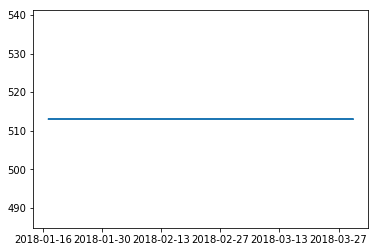

In [40]:
plt.plot(df.loc[delete_index,"trajectory__pPos_x"])

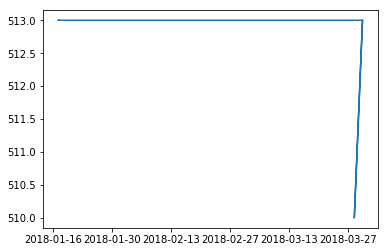

In [41]:
plt.plot(df.loc[delete_index,"trajectory__pPos_y"])

In [42]:
df.drop(index=delete_index,inplace=True)

In [44]:
df.to_hdf("all_wind_clean.h5","df")

In [46]:
df2=pd.read_hdf("all_wind_clean.h5")

In [47]:
df2.shape

(2730514, 21)

In [4]:
df.shape

(2823474, 46)